# Calidad y pre-procesamiento de datos <a class="tocSkip">

por Mónica Tatiana Gutierrez B

version 0.1, Feb 2021

Parte de la clase Curso de visualización para ciencia de datos en Python

## Importar librerías

In [4]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) #Mostrar todas las columnas

## Importar datos

Datos extraídos de la fuente 'SECOP II - Procesos de Contratación'

Fecha creación: 30 de septiembre de 2019

Datos actualizados por última vez: 31 de enero de 2021

Fuente: [Datos SECOP](https://www.datos.gov.co/Gastos-Gubernamentales/SECOP-II-Procesos-de-Contrataci-n/p6dx-8zbt) 

In [5]:
df_SECOP = pd.read_csv('SECOP_II_-_Procesos_de_Contrataci_n.csv', 
                 sep = ',',
                 thousands=',', decimal='.',
                 skip_blank_lines=True,
                 low_memory = False,
                 dtype={
                     'Nit Entidad': str
                 })
df_SECOP.head()

FileNotFoundError: [Errno 2] File SECOP_II_-_Procesos_de_Contrataci_n.csv does not exist: 'SECOP_II_-_Procesos_de_Contrataci_n.csv'

Datos extraídos de la fuente 'PROCESOS_SSPD_DESDE_2018'

Fecha creación: 5 de agosto de 2020

Datos actualizados por última vez: 9 de febrero de 2021

Fuente: [Datos Procesos](https://www.datos.gov.co/Gastos-Gubernamentales/PROCESOS_SSPD_DESDE_2018/dkww-yxre) 

In [6]:
df_procesos = pd.read_csv('PROCESOS_SSPD_DESDE_2018.csv', 
                 sep = ',',
                 thousands=',', decimal='.',
                 skip_blank_lines=True,
                 low_memory = False)
df_procesos.head()

,Modalidad de Contratacion,Fecha de Publicacion del Proceso,Referencia del Proceso,Número de Proceso,Descripción del Procedimiento,Cuantía,Unidad de Contratación,URLProceso
0,Contratación directa,30/12/2018,82017518,Prestar servicios profesionales jurídicos para...,Prestar servicios profesionales jurídicos para...,18928000,DIRECCION TERRITORIAL NORTE,https://community.secop.gov.co/Public/Tenderin...
1,Contratación directa,26/01/2021,84002721,El Contratista se obliga a prestar los servici...,El Contratista se obliga a prestar los servici...,29880000,DIRECCION TERRITORIAL ORIENTE,https://community.secop.gov.co/Public/Tenderin...
2,Contratación directa,16/01/2020,81001420,Prestar servicios profesionales jurídicos para...,Prestar servicios profesionales jurídicos para...,39325400,DIRECCCION TERRITORIAL CENTRO,https://community.secop.gov.co/Public/Tenderin...
3,Contratación directa,18/01/2019,80000619,Prestar los servicios profesionales a la Direc...,Prestar los servicios profesionales a la Direc...,91738644,DIRECCION ADMINISTRATIVA,https://community.secop.gov.co/Public/Tenderin...
4,Contratación directa,26/01/2021,020000821,Prestar los servicios profesionales en la Dire...,Prestar los servicios profesionales en la Dire...,48999990,DIRECCION ADMINISTRATIVA,https://community.secop.gov.co/Public/Tenderin...


Dimensión de los datos

In [4]:
print('SECOP')
print('Filas: ', df_SECOP.shape[0])
print('Columnas: ', df_SECOP.shape[1])

SECOP
Filas:  805631
Columnas:  57


In [5]:
print('Procesos')
print('Filas: ', df_procesos.shape[0])
print('Columnas: ', df_procesos.shape[1])

Procesos
Filas:  2352
Columnas:  8


Atributos y tipos de atributo

In [6]:
df_SECOP.dtypes

Entidad                                                   object
Nit Entidad                                               object
Departamento Entidad                                      object
Ciudad Entidad                                            object
OrdenEntidad                                              object
Entidad Centralizada                                      object
ID del Proceso                                            object
Referencia del Proceso                                    object
PCI                                                       object
ID del Portafolio                                         object
Nombre del Procedimiento                                  object
Descripción del Procedimiento                             object
Fase                                                      object
Fecha de Publicacion del Proceso                          object
Fecha de Ultima Publicación                               object
Fecha de Publicacion (Fas

In [7]:
df_procesos.dtypes

Modalidad de Contratacion           object
Fecha de Publicacion del Proceso    object
Referencia del Proceso              object
Número de Proceso                   object
Descripción del Procedimiento       object
Cuantía                              int64
Unidad de Contratación              object
URLProceso                          object
dtype: object

## Completitud

In [8]:
df_SECOP['Fecha de Recepcion de Respuestas'].isnull()

0         True
1         True
2         True
3         True
4         True
          ... 
805626    True
805627    True
805628    True
805629    True
805630    True
Name: Fecha de Recepcion de Respuestas, Length: 805631, dtype: bool

In [9]:
df_SECOP['Fecha de Recepcion de Respuestas'].isnull().sum()

602280

In [10]:
for col in df_SECOP.columns:
    num_missing = df_SECOP[col].isnull().sum()
    pct_missing = np.mean(df_SECOP[col].isnull())
    #print(col," - ",round(pct_missing*100, 2),"% - ",num_missing)
    print('{} - {}% - {}'.format(col,round(pct_missing*100, 2),num_missing))

Entidad - 0.0% - 0
Nit Entidad - 0.0% - 0
Departamento Entidad - 0.0% - 0
Ciudad Entidad - 0.0% - 0
OrdenEntidad - 0.0% - 0
Entidad Centralizada - 0.0% - 0
ID del Proceso - 0.0% - 0
Referencia del Proceso - 0.0% - 0
PCI - 0.16% - 1315
ID del Portafolio - 0.0% - 0
Nombre del Procedimiento - 0.0% - 1
Descripción del Procedimiento - 1.1% - 8828
Fase - 0.0% - 0
Fecha de Publicacion del Proceso - 0.0% - 0
Fecha de Ultima Publicación - 0.0% - 0
Fecha de Publicacion (Fase Planeacion Precalificacion) - 100.0% - 805630
Fecha de Publicacion (Fase Seleccion Precalificacion) - 100.0% - 805630
Fecha de Publicacion (Manifestacion de Interes) - 99.99% - 805581
Fecha de Publicacion (Fase Borrador) - 96.46% - 777116
Fecha de Publicacion (Fase Seleccion) - 3.55% - 28567
Precio Base - 0.0% - 0
Modalidad de Contratacion - 0.0% - 0
Justificación Modalidad de Contratación - 0.0% - 0
Duracion - 0.0% - 0
Unidad de Duracion - 0.0% - 0
Fecha de Recepcion de Respuestas - 74.76% - 602280
Fecha de Apertura de Resp

In [11]:
df_SECOP[df_SECOP["Nombre del Procedimiento"].isnull() == True]

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,Entidad Centralizada,ID del Proceso,Referencia del Proceso,PCI,ID del Portafolio,Nombre del Procedimiento,Descripción del Procedimiento,Fase,Fecha de Publicacion del Proceso,Fecha de Ultima Publicación,Fecha de Publicacion (Fase Planeacion Precalificacion),Fecha de Publicacion (Fase Seleccion Precalificacion),Fecha de Publicacion (Manifestacion de Interes),Fecha de Publicacion (Fase Borrador),Fecha de Publicacion (Fase Seleccion),Precio Base,Modalidad de Contratacion,Justificación Modalidad de Contratación,Duracion,Unidad de Duracion,Fecha de Recepcion de Respuestas,Fecha de Apertura de Respuesta,Fecha de Apertura Efectiva,Ciudad de la Unidad de Contratación,Nombre de la Unidad de Contratación,Proveedores Invitados,Proveedores con Invitacion Directa,Visualizaciones del Procedimiento,Proveedores que Manifestaron Interes,Respuestas al Procedimiento,Respuestas Externas,Conteo de Respuestas a Ofertas,Proveedores Unicos con Respuestas,Numero de Lotes,Estado del Procedimiento,ID Estado del Procedimiento,Adjudicado,ID Adjudicacion,CodigoProveedor,Departamento Proveedor,Ciudad Proveedor,Fecha Adjudicacion,Valor Total Adjudicacion,Nombre del Adjudicador,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Codigo Principal de Categoria,Estado de Apertura del Proceso,Tipo de Contrato,Subtipo de Contrato,Categorias Adicionales,URLProceso
630549,Empresa Nacional Promotora del Desarrollo Terr...,899999316,Distrito Capital de Bogotá,No Definido,Nacional,No,CO1.REQ.1612974,2319-219139,ND,CO1.BDOS.1564129,NaN,APOYAR A ENTERRITORIO EN TODAS LAS ACTIVIDADES...,Presentación de oferta,11/17/2020,11/17/2020,NaN,NaN,NaN,NaN,11/17/2020,24424391,Contratación régimen especial,Regla aplicable,5,Meses,NaN,NaN,NaN,Bogotá,SUBGERENCIA DE OPERACIONES,0,0,0,0,0,0,0,0,0,Adjudicado,70,No,No Adjudicado,No Adjudicado,No aplica,No aplica,NaN,0,No Adjudicado,No Adjudicado,No Adjudicado,V1.80111600,Abierto,Servicios de aprovisionamiento,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...


In [12]:
df_SECOP[df_SECOP["NIT del Proveedor Adjudicado"].isnull() == True]

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,Entidad Centralizada,ID del Proceso,Referencia del Proceso,PCI,ID del Portafolio,Nombre del Procedimiento,Descripción del Procedimiento,Fase,Fecha de Publicacion del Proceso,Fecha de Ultima Publicación,Fecha de Publicacion (Fase Planeacion Precalificacion),Fecha de Publicacion (Fase Seleccion Precalificacion),Fecha de Publicacion (Manifestacion de Interes),Fecha de Publicacion (Fase Borrador),Fecha de Publicacion (Fase Seleccion),Precio Base,Modalidad de Contratacion,Justificación Modalidad de Contratación,Duracion,Unidad de Duracion,Fecha de Recepcion de Respuestas,Fecha de Apertura de Respuesta,Fecha de Apertura Efectiva,Ciudad de la Unidad de Contratación,Nombre de la Unidad de Contratación,Proveedores Invitados,Proveedores con Invitacion Directa,Visualizaciones del Procedimiento,Proveedores que Manifestaron Interes,Respuestas al Procedimiento,Respuestas Externas,Conteo de Respuestas a Ofertas,Proveedores Unicos con Respuestas,Numero de Lotes,Estado del Procedimiento,ID Estado del Procedimiento,Adjudicado,ID Adjudicacion,CodigoProveedor,Departamento Proveedor,Ciudad Proveedor,Fecha Adjudicacion,Valor Total Adjudicacion,Nombre del Adjudicador,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Codigo Principal de Categoria,Estado de Apertura del Proceso,Tipo de Contrato,Subtipo de Contrato,Categorias Adicionales,URLProceso
6995,RADIO TELEVISION NACIONAL DE COLOMBIA.,900002583,No Definido,No Definido,Nacional,Si,CO1.REQ.1023403,IA 30-2019,ND,CO1.BDOS.986033,administración delegada,"Radio Televisión Nacional de Colombia - RTVC, ...",Presentación de oferta,11/26/2019,11/25/2019,NaN,NaN,NaN,NaN,11/25/2019,998260075,Contratación régimen especial (con ofertas),Regla aplicable,6,Meses,12/02/2019,12/02/2019,12/02/2019,Bogotá,PROCESOS DE SELECCION,12,0,0,0,2,0,0,2,0,Adjudicado,70,Si,CO1.AWD.643204,708094966,Distrito Capital de Bogotá,Bogotá,12/18/2019,998260075,IVONNE PULIDO SALGADO,UNION TEMPORAL PRIME-VIRTUAL 030-2019,NaN,V1.83111800,Cerrado,27 - Otros servicios,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...
238594,AGENCIA DE RENOVACION DEL TERRITORIO,901006886,Distrito Capital de Bogotá,No Definido,Nacional,Si,CO1.REQ.885261,SC 0003 CM 19 (Presentación de oferta),02-14-01,CO1.BDOS.840128,ESTRUCTURACION DE PROYECTOS DE INFRAESTRUCTURA...,Realizar la estructuración de proyectos de inf...,Presentación de oferta,06/10/2019,06/10/2019,NaN,NaN,NaN,NaN,06/10/2019,12583118895,Concurso de méritos abierto,Ley 1150 de 2007,6,Meses,06/26/2019,07/18/2019,07/22/2019,Bogotá,DIRECCIÓN ESTRUCTURACIÓN Y EJECUCIÓN DE PROYECTOS,65,0,0,0,10,0,0,10,3,Adjudicado,70,Si,CO1.AWD.553525,707254066,Distrito Capital de Bogotá,No aplica,07/31/2019,4431077275,JOSE MAURICIO MANCIPE VILLAMIZAR,CONSORCIO GCH CONSULTORES,NaN,V1.80101500,Cerrado,Consultoría,No Especificado,"V1.80101600, V1.81101500, V1.81102200",https://community.secop.gov.co/Public/Tenderin...
441562,UNIDAD ADMINISTRATIVA ESPECIAL DE AERONÁUTICA ...,899999059,Magdalena,Plato,Nacional,Si,CO1.REQ.1495326,20001078 H4 (Manifestación de interés (Menor C...,24-12-00-000,CO1.BDOS.1425585,RMTC0847 MANTENER Y ADECUAR LOS BACHES Y REALI...,RMTC0847 MANTENER Y ADECUAR LOS BACHES Y REALI...,Presentación de oferta,09/15/2020,09/15/2020,NaN,NaN,NaN,NaN,09/15/2020,350000000,Selección Abreviada de Menor Cuantía,Presupuesto menor al 10% de la Menor Cuantía,2,Meses,09/18/2020,09/18/2020,09/18/2020,Villavicencio,REGIONAL META,43,43,0,0,5,0,0,5,0,Adjudicado,70,Si,CO1.AWD.853734,709811483,Distrito Capital de Bogotá,Bogotá,10/02/2020,350000000,Jennifer Martinez,CONSORCIO JERUSALEN,NaN,V1.72141100,Cerrado,Obra,No Especificado,ND,https://community.secop.gov.co/Public/Tenderin...
507664,CENTRO DE DIAGNOSTICO AUTOMOTOR DEL VALLE LIMI...,890311425,No Definido,No Definido,Territorial,Si,CO1.REQ.1326846,CDAV-20200114-LP (Presentación de oferta),ND,CO1.BDOS.1238226,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS V...,PRESTAR EL SERV

### Seleccionar columnas que se usarán para el análisis

In [13]:
columns = ['Entidad',
          'Nit Entidad',
          'Departamento Entidad',
          'Ciudad Entidad',
          'OrdenEntidad',
          'ID del Proceso',
          'Referencia del Proceso',
          'ID del Portafolio',
          'Nombre del Procedimiento',
          'Fase',
          'Fecha de Publicacion del Proceso',
          'Fecha de Ultima Publicación',
          'Precio Base',
          'Modalidad de Contratacion',
          'Duracion',
          'Unidad de Duracion',
          'Adjudicado',
          'ID Adjudicacion',
          'CodigoProveedor',
          'Nombre del Proveedor Adjudicado',
          'NIT del Proveedor Adjudicado',
          'Departamento Proveedor',
          'Ciudad Proveedor',
          'Valor Total Adjudicacion',
          'Tipo de Contrato',
          'Subtipo de Contrato']
df_SECOP0 = df_SECOP.copy()
df_SECOP0 = df_SECOP0[columns]
df_SECOP0

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso,Fecha de Ultima Publicación,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Subtipo de Contrato
0,SUPERINTENDENCIA DE VIGILANCIA Y SEGURIDAD PRI...,800217123,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1090917,CDPS-018-2020_2,CO1.BDOS.1054442,CONTRATO DE PRESTACIÓN DE SERVICIOS.,Presentación de oferta,01/21/2020,01/21/2020,34387200,Contratación directa,8,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
1,MUNICIPIO DE SANTIAGO DE CALI - SECRETARIA DE ...,890399011,No Definido,No Definido,Territorial,CO1.REQ.1263855,4145.010.32.1.0131-2020,CO1.BDOS.1225749,PROFESIONALES DESARROLLO DE ESTRATEGIAS PARA L...,Presentación de oferta,04/29/2020,04/29/2020,29117793,Contratación directa,0,ND,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
2,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,No Definido,No Definido,Territorial,CO1.REQ.1116938,SGA-CD-151-2020_2,CO1.BDOS.1077727,SGA-CD-151-2020_2,Presentación de oferta,02/03/2020,02/03/2020,29816133,Contratación directa,165,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
3,SENA REGIONAL DISTRITO CAPITAL Grupo Administr...,899999034,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1546629,PSP-DC-CICG-083-2020,CO1.BDOS.1501825,Prestación de servicios personales de carácter...,Presentación de oferta,10/15/2020,10/15/2020,6443255,Contratación directa,51,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
4,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,900971006,No Definido,No Definido,Territorial,CO1.REQ.1765407,CPS-1339-2021,CO1.BDOS.1715307,PRESTAR SERVICIOS PROFESIONALES Y APOYO A LA G...,Presentación de oferta,01/29/2021,01/29/2021,2980278,Contratación régimen especial,1,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Decreto 092 de 2017,No Especificado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805626,MINISTERIO DEL INTERIOR,830114475,No Definido,No Definido,Nacional,CO1.REQ.650468,PS 2016 DE 2018,CO1.BDOS.629401,VIVIANA MARCELA SOLANO RESTREPO,Presentación de oferta,12/10/2018,12/10/2018,2700000,Contratación directa,21,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
805627,SECRETARIA DE INFRAESTRUCTURA Y VALORIZACION -...,8903990295,Valle del Cauca,Cali,Territorial,CO1.REQ.1717088,1.310.02-59.2-0158,CO1.BDOS.1666344,1.310.02-59.2-0158,Presentación de oferta,01/17/2021,01/17/2021,21000000,Contratación directa,90,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
805628,HOSPITAL MILITAR CENTRAL,830040256,Distrito Capital de Bogotá,No Definido,Nacional,CO1.REQ.643808,CD 104-2018,CO1.BDOS.622411,MEDICO GENERAL DE URGENCIAS,Presentación de oferta,12/06/2018,12/06/2018,56982410,Contratación directa,12,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
805629,HOSPITAL FEDERICO LLERAS ACOSTA DE IBAGUE TOLI...,890706833,Tolima,Ibagué,Territorial,CO1.REQ.1711499,OAJ-2021-0108-MAYRA ALEJANDRA QUINTERO,CO1.BDOS.1660998,OAJ-2021-0108-MAYRA ALEJANDRA QUINTERO,Presentación de oferta,01/20/2021,01/20/2021,31533450,Contrataci

### Borrar registros con datos perdidos

In [14]:
print('Antes de borrar registros: ',df_SECOP0.shape)
for col in df_SECOP0.columns:
    missing = df_SECOP0[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df_SECOP0['{}_ismissing'.format(col)] = missing
ismissing_cols = [col for col in df_SECOP0.columns if 'ismissing' in col]
df_SECOP0['num_missing'] = df_SECOP0[ismissing_cols].sum(axis=1)

Antes de borrar registros:  (805631, 26)
created missing indicator for: Nombre del Procedimiento
created missing indicator for: NIT del Proveedor Adjudicado


In [15]:
df_SECOP0[df_SECOP0.num_missing >= 1]

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso,Fecha de Ultima Publicación,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Subtipo de Contrato,Nombre del Procedimiento_ismissing,NIT del Proveedor Adjudicado_ismissing,num_missing
6995,RADIO TELEVISION NACIONAL DE COLOMBIA.,900002583,No Definido,No Definido,Nacional,CO1.REQ.1023403,IA 30-2019,CO1.BDOS.986033,administración delegada,Presentación de oferta,11/26/2019,11/25/2019,998260075,Contratación régimen especial (con ofertas),6,Meses,Si,CO1.AWD.643204,708094966,UNION TEMPORAL PRIME-VIRTUAL 030-2019,NaN,Distrito Capital de Bogotá,Bogotá,998260075,27 - Otros servicios,No Especificado,False,True,1
238594,AGENCIA DE RENOVACION DEL TERRITORIO,901006886,Distrito Capital de Bogotá,No Definido,Nacional,CO1.REQ.885261,SC 0003 CM 19 (Presentación de oferta),CO1.BDOS.840128,ESTRUCTURACION DE PROYECTOS DE INFRAESTRUCTURA...,Presentación de oferta,06/10/2019,06/10/2019,12583118895,Concurso de méritos abierto,6,Meses,Si,CO1.AWD.553525,707254066,CONSORCIO GCH CONSULTORES,NaN,Distrito Capital de Bogotá,No aplica,4431077275,Consultoría,No Especificado,False,True,1
441562,UNIDAD ADMINISTRATIVA ESPECIAL DE AERONÁUTICA ...,899999059,Magdalena,Plato,Nacional,CO1.REQ.1495326,20001078 H4 (Manifestación de interés (Menor C...,CO1.BDOS.1425585,RMTC0847 MANTENER Y ADECUAR LOS BACHES Y REALI...,Presentación de oferta,09/15/2020,09/15/2020,350000000,Selección Abreviada de Menor Cuantía,2,Meses,Si,CO1.AWD.853734,709811483,CONSORCIO JERUSALEN,NaN,Distrito Capital de Bogotá,Bogotá,350000000,Obra,No Especificado,False,True,1
507664,CENTRO DE DIAGNOSTICO AUTOMOTOR DEL VALLE LIMI...,890311425,No Definido,No Definido,Territorial,CO1.REQ.1326846,CDAV-20200114-LP (Presentación de oferta),CO1.BDOS.1238226,MANTENIMIENTO PREVENTIVO Y CORRECTIVO DE LOS V...,Presentación de oferta,06/09/2020,06/09/2020,424047562,Licitación pública,7,Meses,Si,CO1.AWD.788519,710245382,UNION TEMPPORAL ARA-INGE CDAV - MOVILIDAD 2020,NaN,Valle del Cauca,Cali,424047562,Servicios de aprovisionamiento,No Especificado,False,True,1
545559,UNIDAD ADMINISTRATIVA ESPECIAL DE AERONÁUTICA ...,899999059,Magdalena,Plato,Nacional,CO1.REQ.1398144,20000886 H4 DE 2020 (Manifestación de interés ...,CO1.BDOS.1311462,REALIZAR EL MANTENIMIENTO LADO AIRE Y LADO TIE...,Presentación de oferta,07/24/2020,07/23/2020,270000000,Selección Abreviada de Menor Cuantía,3,Meses,Si,CO1.AWD.832022,709811483,CONSORCIO JERUSALEN,NaN,Distrito Capital de Bogotá,Bogotá,195419978,Obra,No Especificado,False,True,1
622786,INSTITUTO NACIONAL DE VIAS,800215807,Boyacá,Tunja,Nacional,CO1.REQ.1332713,SA-MC-DO-SRN-006-2020 (Manifestación de interé...,CO1.BDOS.1272843,MANTENIMIENTO DE LAS VIAS 1701 GUACHUCAL-EL ES...,Presentación de oferta,06/12/2020,06/12/2020,390450972,Selección Abreviada de Menor Cuantía,2,Meses,Si,CO1.AWD.796106,709811483,CONSORCIO JERUSALEN,NaN,Distrito Capital de Bogotá,Bogotá,333551692,Obra,No Especificado,False,True,1
630549,Empresa Nacional Promotora del Desarrollo Terr...,899999316,Distrito Capital de Bogotá,No Definido,Nacional,CO1.REQ.1612974,2319-219139,CO1.BDOS.1564129,NaN,Presentación de oferta,11/17/2020,11/17/2020,24424391,Contratación régimen especial,5,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado,True,False,1
653331,INSTITUTO NACIONAL DE VIAS,800215807,Boyacá,Tunja,Nacional,CO1.REQ.619083,CMA-DT-GGP-151-2018 (Presentación de oferta),CO1.BDOS.585458,INTERVENTORÍA PARA EL MEJORAMIENTO DE LA VÍA K...,Presentación de oferta,11/14/2018,11/14/2018,629199838,Concurso de méritos abierto,4,Meses,Si,CO1.AWD.408878,705694057,CONSORCIO I

In [16]:
ind_missing = df_SECOP0[df_SECOP0['num_missing'] >= 1].index
df_less_missing_rows = df_SECOP0.drop(ind_missing, axis=0)
df_less_missing_rows = df_less_missing_rows[columns]
print('Después de borrar registros: ',df_less_missing_rows.shape)

Después de borrar registros:  (805621, 26)


### Imputar datos perdidos

#### Datos categóricos

In [17]:
df1 = df_SECOP0.copy()

In [18]:
df1[df1['Nombre del Procedimiento'].isnull()]

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso,Fecha de Ultima Publicación,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Subtipo de Contrato,Nombre del Procedimiento_ismissing,NIT del Proveedor Adjudicado_ismissing,num_missing
630549,Empresa Nacional Promotora del Desarrollo Terr...,899999316,Distrito Capital de Bogotá,No Definido,Nacional,CO1.REQ.1612974,2319-219139,CO1.BDOS.1564129,NaN,Presentación de oferta,11/17/2020,11/17/2020,24424391,Contratación régimen especial,5,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado,True,False,1


In [19]:
df1['Nombre del Procedimiento'] = df_SECOP0['Nombre del Procedimiento'].fillna('Sin nombre')
df1.loc[630549]

Entidad                                   Empresa Nacional Promotora del Desarrollo Terr...
Nit Entidad                                                                       899999316
Departamento Entidad                                             Distrito Capital de Bogotá
Ciudad Entidad                                                                  No Definido
OrdenEntidad                                                                       Nacional
ID del Proceso                                                              CO1.REQ.1612974
Referencia del Proceso                                                          2319-219139
ID del Portafolio                                                          CO1.BDOS.1564129
Nombre del Procedimiento                                                         Sin nombre
Fase                                                                 Presentación de oferta
Fecha de Publicacion del Proceso                                                

#### Datos numéricos

Reemplazar el valor por la mediana

In [20]:
q90 = df_less_missing_rows['Valor Total Adjudicacion'].quantile(0.90)
print(q90)

21000000.0


In [21]:
df2 = df_less_missing_rows.copy()
df2['Valor Total Adjudicacion'] = df2['Valor Total Adjudicacion'].replace([0],q90)
df2['Valor Total Adjudicacion'].describe()

count    8.056210e+05
mean     3.717862e+10
std      1.803038e+13
min      1.000000e+00
25%      2.100000e+07
50%      2.100000e+07
75%      2.100000e+07
max      1.187746e+16
Name: Valor Total Adjudicacion, dtype: float64

### Asumir que la categoría "perdido" puede ser una opción

Categóricos

In [22]:
df3 = df_SECOP0.copy()
df3['Nombre del Procedimiento'] = df_SECOP['Nombre del Procedimiento'].fillna('_MISSING_')
df3.loc[630549]

Entidad                                   Empresa Nacional Promotora del Desarrollo Terr...
Nit Entidad                                                                       899999316
Departamento Entidad                                             Distrito Capital de Bogotá
Ciudad Entidad                                                                  No Definido
OrdenEntidad                                                                       Nacional
ID del Proceso                                                              CO1.REQ.1612974
Referencia del Proceso                                                          2319-219139
ID del Portafolio                                                          CO1.BDOS.1564129
Nombre del Procedimiento                                                          _MISSING_
Fase                                                                 Presentación de oferta
Fecha de Publicacion del Proceso                                                

Numéricos

In [23]:
df_SECOP0['Valor Total Adjudicacion'] = df_SECOP0['Valor Total Adjudicacion'].fillna(-999)

**_Ejercicio_**: Realizar análisis de completitud para el dataset de procesos.

¿Cuál es el porcentaje de datos perdidos?

¿Qué hacer con los datos perdidos: Borrar, imputar, asumir categoría de perdido o simplemente dejarlo así?¿Por qué?

## Coherencia

### Datos duplicados

In [24]:
df_SECOP_C = df_less_missing_rows
df_SECOP_C[df_SECOP_C.duplicated()]

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso,Fecha de Ultima Publicación,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Subtipo de Contrato
2067,AGENCIA NACIONAL DE CONTRATACIÓN PÚBLICA -COLO...,900514813,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.932354,CCENEG-018-1-2019 (Presentación de oferta),CO1.BDOS.870313,Compra o Alquiler de ETP (Presentación de oferta),Presentación de oferta,08/08/2019,08/08/2019,0,Licitación Pública Acuerdo Marco de Precios,2,Años,Si,CO1.AWD.606023,700191034,KEY MARKET SAS,830073623,Cesar,Valledupar,0,Acuerdo Marco,No Especificado
2068,AGENCIA NACIONAL DE CONTRATACIÓN PÚBLICA -COLO...,900514813,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.932354,CCENEG-018-1-2019 (Presentación de oferta),CO1.BDOS.870313,Compra o Alquiler de ETP (Presentación de oferta),Presentación de oferta,08/08/2019,08/08/2019,0,Licitación Pública Acuerdo Marco de Precios,2,Años,Si,CO1.AWD.606023,700191034,KEY MARKET SAS,830073623,Cesar,Valledupar,0,Acuerdo Marco,No Especificado
2069,AGENCIA NACIONAL DE CONTRATACIÓN PÚBLICA -COLO...,900514813,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.932354,CCENEG-018-1-2019 (Presentación de oferta),CO1.BDOS.870313,Compra o Alquiler de ETP (Presentación de oferta),Presentación de oferta,08/08/2019,08/08/2019,0,Licitación Pública Acuerdo Marco de Precios,2,Años,Si,CO1.AWD.606023,700191034,KEY MARKET SAS,830073623,Cesar,Valledupar,0,Acuerdo Marco,No Especificado
2070,AGENCIA NACIONAL DE CONTRATACIÓN PÚBLICA -COLO...,900514813,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.932354,CCENEG-018-1-2019 (Presentación de oferta),CO1.BDOS.870313,Compra o Alquiler de ETP (Presentación de oferta),Presentación de oferta,08/08/2019,08/08/2019,0,Licitación Pública Acuerdo Marco de Precios,2,Años,Si,CO1.AWD.606023,700191034,KEY MARKET SAS,830073623,Cesar,Valledupar,0,Acuerdo Marco,No Especificado
2071,AGENCIA NACIONAL DE CONTRATACIÓN PÚBLICA -COLO...,900514813,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.932354,CCENEG-018-1-2019 (Presentación de oferta),CO1.BDOS.870313,Compra o Alquiler de ETP (Presentación de oferta),Presentación de oferta,08/08/2019,08/08/2019,0,Licitación Pública Acuerdo Marco de Precios,2,Años,Si,CO1.AWD.606023,700191034,KEY MARKET SAS,830073623,Cesar,Valledupar,0,Acuerdo Marco,No Especificado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
802406,AGENCIA NACIONAL DE CONTRATACIÓN PÚBLICA -COLO...,900514813,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.195736,LP-AMP-147-2017 (Presentación de oferta),CO1.BDOS.179209,Acuerdo Marco para la adquisición de Equipos B...,Presentación de oferta,07/26/2017,07/26/2017,0,Licitación Pública Acuerdo Marco de Precios,2,Años,Si,CO1.AWD.160126,700085020,3-60 LTDA,900195934,Distrito Capital de Bogotá,No aplica,0,Acuerdo Marco,No Especificado
803209,AGENCIA NACIONAL DE CONTRATACIÓN PÚBLICA -COLO...,900514813,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1539490,CCENEG-028-1-2020 (Presentación de oferta),CO1.BDOS.1433570,Acuerdo Marco para la adquisición del servicio...,Presentación de oferta,10/08/2020,10/08/2020,0,Licitación Pública Acuerdo Marco de Precios,28,Meses,Si,CO1.AWD.902821,711727313,UNION TEMPORAL ANDINO 2020,No Definido,Distrito Capital de Bogotá,Bogotá,0,Acuerdo Marco,No Especificado
803210,AGENCIA NACIONAL DE CONTRATACIÓN PÚBLICA -COLO...,900514813,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1539490,CCENEG-028-1-2020 (Presentación de oferta),CO1.BDOS.1433570,Acuerdo Marco para la adquisición del servicio...,Presentación de oferta,10/08/2020,10/08/2020,0,Licitación Pública Acuerdo Marco de Precios,

In [25]:
df_dedupped = df_SECOP.drop_duplicates()
print(df_SECOP.shape)
print(df_dedupped.shape)

(805631, 57)
(803467, 57)


In [26]:
df_dedupped_SECOP = df_SECOP_C.drop_duplicates()
print(df_SECOP_C.shape)
print(df_dedupped_SECOP.shape)

(805621, 26)
(803457, 26)


In [27]:
df_dedupped_procesos = df_procesos.drop_duplicates()
print(df_procesos.shape)
print(df_dedupped_procesos.shape)

(2352, 8)
(2350, 8)


In [28]:
df_dedupped_procesos.head()

,Modalidad de Contratacion,Fecha de Publicacion del Proceso,Referencia del Proceso,Número de Proceso,Descripción del Procedimiento,Cuantía,Unidad de Contratación,URLProceso
0,Contratación directa,30/12/2018,82017518,Prestar servicios profesionales jurídicos para...,Prestar servicios profesionales jurídicos para...,18928000,DIRECCION TERRITORIAL NORTE,https://community.secop.gov.co/Public/Tenderin...
1,Contratación directa,26/01/2021,84002721,El Contratista se obliga a prestar los servici...,El Contratista se obliga a prestar los servici...,29880000,DIRECCION TERRITORIAL ORIENTE,https://community.secop.gov.co/Public/Tenderin...
2,Contratación directa,16/01/2020,81001420,Prestar servicios profesionales jurídicos para...,Prestar servicios profesionales jurídicos para...,39325400,DIRECCCION TERRITORIAL CENTRO,https://community.secop.gov.co/Public/Tenderin...
3,Contratación directa,18/01/2019,80000619,Prestar los servicios profesionales a la Direc...,Prestar los servicios profesionales a la Direc...,91738644,DIRECCION ADMINISTRATIVA,https://community.secop.gov.co/Public/Tenderin...
4,Contratación directa,26/01/2021,020000821,Prestar los servicios profesionales en la Dire...,Prestar los servicios profesionales en la Dire...,48999990,DIRECCION ADMINISTRATIVA,https://community.secop.gov.co/Public/Tenderin...


**_Ejercicio_**: ¿Cuál es el ID de la base 'procesos'?

### Relaciones entre tablas

La _integridad referencial_ es un sistema de reglas que utilizan la mayoría de las bases de datos relacionales para asegurarse que los registros de tablas relacionadas son válidos y que no se borren o cambien datos relacionados de forma accidental produciendo errores de integridad. Ref: [https://www.aulaclic.es/sql/b_8_1_1.htm](https://www.aulaclic.es/sql/b_8_1_1.htm)

* Relación Uno a Uno: Cuando un registro de una tabla sólo puede estar relacionado con un único registro de la otra tabla y viceversa.


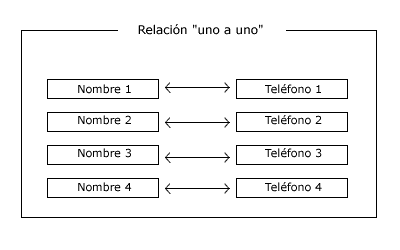


* Relación Uno a Varios: Cuando un registro de una tabla (tabla secundaria) sólo puede estar relacionado con un único registro de la otra tabla (tabla principal) y un registro de la tabla principal puede tener más de un registro relacionado en la tabla secundaria, en este caso se suele hacer referencia a la tabla principal como tabla 'padre' y a la tabla secundaria como tabla 'hijo', entonces la regla se convierte en 'un padre puede tener varios hijos pero un hijo solo tiene un padre (regla más fácil de recordar).

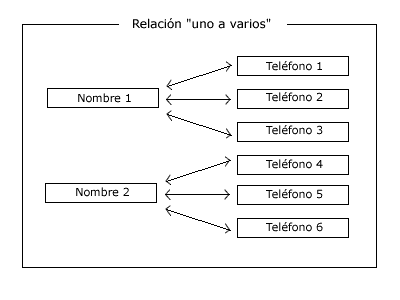

* Relación Varios a Varios: Cuando un registro de una tabla puede estar relacionado con más de un registro de la otra tabla y viceversa. En este caso las dos tablas no pueden estar relacionadas directamente, se tiene que añadir una tabla entre las dos que incluya los pares de valores relacionados entre sí.

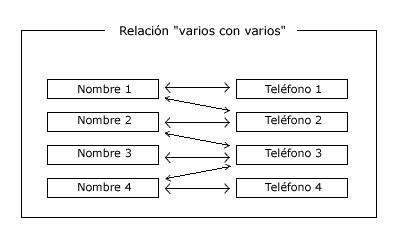

In [29]:
df = df_dedupped_SECOP.merge(df_dedupped_procesos, left_on='Referencia del Proceso', right_on='Referencia del Proceso')
print('Dimension bases unidas: ', df.shape)
print('Dimension SECOP: ', df_dedupped_SECOP.shape)
print('Dimension procesos: ', df_dedupped_procesos.shape)

Dimension bases unidas:  (2257, 33)
Dimension SECOP:  (803457, 26)
Dimension procesos:  (2350, 8)


**Tipos de uniones de base de datos**

Las uniones son funciones básicas de las bases de datos que permiten fusionar los contenidos de dos tablas diferentes y/o bases de datos diferentes en una vista única en base a un campo común o campos entre ellos (es decir, la condición de fusión). Ref [http://help.seagullscientific.com/2016/es/Content/DatabaseJoinsReference.htm](http://help.seagullscientific.com/2016/es/Content/DatabaseJoinsReference.htm)

* Fusión interior (Inner join)

En una fusión interior, se crean nuevos resultados devolviendo y combinando todas las filas de las tablas específicas que tengan valores _coincidentes_ para el/los campo(s) de fusión que se hayan especificado. Cuando no haya coincidencias entre una fila de la Tabla A y una fila de la Tabla B, dicha fila simplemente se omite de los resultados. 

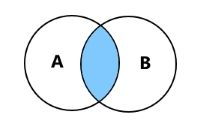

In [30]:
df = df_dedupped_SECOP.merge(df_dedupped_procesos, 
                             left_on='Referencia del Proceso', 
                             right_on='Referencia del Proceso', 
                             how = 'inner')
print('Dimension bases unidas: ', df.shape)
print('Dimension SECOP: ', df_dedupped_SECOP.shape)
print('Dimension procesos: ', df_dedupped_procesos.shape)

Dimension bases unidas:  (2257, 33)
Dimension SECOP:  (803457, 26)
Dimension procesos:  (2350, 8)


* Fusión exterior completa

Una fusión exterior completa devuelve un resultado que enumera todas las filas tanto de la tabla de la derecha como de la izquierda, aunque una fila no tenga ningún valor coincidente en la otra tabla. En el caso de que una fila no tenga una fila coincidente en la otra tabla, el valor que falta se devuelve como NULL.

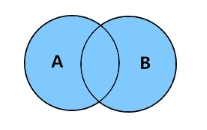

In [31]:
df = df_dedupped_SECOP.merge(df_dedupped_procesos, 
                             left_on='Referencia del Proceso', 
                             right_on='Referencia del Proceso', 
                             how = 'outer')
print('Dimension bases unidas: ', df.shape)
print('Dimension SECOP: ', df_dedupped_SECOP.shape)
print('Dimension procesos: ', df_dedupped_procesos.shape)

Dimension bases unidas:  (803553, 33)
Dimension SECOP:  (803457, 26)
Dimension procesos:  (2350, 8)


In [32]:
df

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso_x,Fecha de Ultima Publicación,Precio Base,Modalidad de Contratacion_x,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Subtipo de Contrato,Modalidad de Contratacion_y,Fecha de Publicacion del Proceso_y,Número de Proceso,Descripción del Procedimiento,Cuantía,Unidad de Contratación,URLProceso
0,SUPERINTENDENCIA DE VIGILANCIA Y SEGURIDAD PRI...,800217123,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1090917,CDPS-018-2020_2,CO1.BDOS.1054442,CONTRATO DE PRESTACIÓN DE SERVICIOS.,Presentación de oferta,01/21/2020,01/21/2020,34387200.0,Contratación directa,8.0,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.0,Servicios de aprovisionamiento,No Especificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MUNICIPIO DE SANTIAGO DE CALI - SECRETARIA DE ...,890399011,No Definido,No Definido,Territorial,CO1.REQ.1263855,4145.010.32.1.0131-2020,CO1.BDOS.1225749,PROFESIONALES DESARROLLO DE ESTRATEGIAS PARA L...,Presentación de oferta,04/29/2020,04/29/2020,29117793.0,Contratación directa,0.0,ND,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.0,Servicios de aprovisionamiento,No Especificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,No Definido,No Definido,Territorial,CO1.REQ.1116938,SGA-CD-151-2020_2,CO1.BDOS.1077727,SGA-CD-151-2020_2,Presentación de oferta,02/03/2020,02/03/2020,29816133.0,Contratación directa,165.0,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.0,Servicios de aprovisionamiento,No Especificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SENA REGIONAL DISTRITO CAPITAL Grupo Administr...,899999034,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1546629,PSP-DC-CICG-083-2020,CO1.BDOS.1501825,Prestación de servicios personales de carácter...,Presentación de oferta,10/15/2020,10/15/2020,6443255.0,Contratación directa,51.0,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.0,Servicios de aprovisionamiento,No Especificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,900971006,No Definido,No Definido,Territorial,CO1.REQ.1765407,CPS-1339-2021,CO1.BDOS.1715307,PRESTAR SERVICIOS PROFESIONALES Y APOYO A LA G...,Presentación de oferta,01/29/2021,01/29/2021,2980278.0,Contratación régimen especial,1.0,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.0,Decreto 092 de 2017,No Especificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803548,NaN,NaN,NaN,NaN,NaN,NaN,016003221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Contratación directa,02/02/2021,Prestar los servicios profesionales a la Ofici...,Prestar los servicios profesionales a la Ofici...,90000000.0,DIRECCION ADMINISTRATIVA,https://community.secop.gov.co/Public/Tenderin...
803549,NaN,NaN,NaN,NaN,NaN,NaN,84002521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Contratación directa,02/02/2021,El Contratista se obliga a prestar los servici...,El Contratista se obliga a prestar los servici...,28796648.0,DIRECCION TERRITORIAL ORIENTE,https://community.secop.gov.co/Public/Tenderin...
803550,NaN,NaN,NaN,NaN,NaN,NaN,83001821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Contratación directa,08/02/2021,Apoyar la implementación de los procesos de em...,Apoyar la implementación de los procesos de em...,26249985.0,DIRECCION TERRITORIAL OCCIDENTE,https://community.secop.gov.co/Public/Tenderin...
803551,NaN,NaN,Na

* Fusión exterior izquierda

Una Fusión exterior izquierda difiere de una fusión interior en que además devuelve todas las filas de la tabla de la izquierda, Tabla A, aunque no haya ninguna fila coincidente en la tabla de la derecha, Tabla B. Las filas de la tabla izquierda que no tengan una fila coincidente en la tabla de la derecha se enumeran en el resultado de la fusión con valores NULL, mostrando que no hay ninguna fila coincidente en la tabla de la derecha.

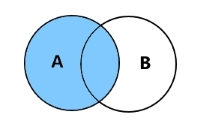

In [33]:
df = df_dedupped_SECOP.merge(df_dedupped_procesos, 
                             left_on='Referencia del Proceso', 
                             right_on='Referencia del Proceso', 
                             how = 'left')
print('Dimension bases unidas: ', df.shape)
print('Dimension SECOP: ', df_dedupped_SECOP.shape)
print('Dimension procesos: ', df_dedupped_procesos.shape)

Dimension bases unidas:  (803457, 33)
Dimension SECOP:  (803457, 26)
Dimension procesos:  (2350, 8)


In [34]:
df.head()

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso_x,Fecha de Ultima Publicación,Precio Base,Modalidad de Contratacion_x,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Subtipo de Contrato,Modalidad de Contratacion_y,Fecha de Publicacion del Proceso_y,Número de Proceso,Descripción del Procedimiento,Cuantía,Unidad de Contratación,URLProceso
0,SUPERINTENDENCIA DE VIGILANCIA Y SEGURIDAD PRI...,800217123,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1090917,CDPS-018-2020_2,CO1.BDOS.1054442,CONTRATO DE PRESTACIÓN DE SERVICIOS.,Presentación de oferta,01/21/2020,01/21/2020,34387200,Contratación directa,8,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MUNICIPIO DE SANTIAGO DE CALI - SECRETARIA DE ...,890399011,No Definido,No Definido,Territorial,CO1.REQ.1263855,4145.010.32.1.0131-2020,CO1.BDOS.1225749,PROFESIONALES DESARROLLO DE ESTRATEGIAS PARA L...,Presentación de oferta,04/29/2020,04/29/2020,29117793,Contratación directa,0,ND,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,No Definido,No Definido,Territorial,CO1.REQ.1116938,SGA-CD-151-2020_2,CO1.BDOS.1077727,SGA-CD-151-2020_2,Presentación de oferta,02/03/2020,02/03/2020,29816133,Contratación directa,165,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SENA REGIONAL DISTRITO CAPITAL Grupo Administr...,899999034,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1546629,PSP-DC-CICG-083-2020,CO1.BDOS.1501825,Prestación de servicios personales de carácter...,Presentación de oferta,10/15/2020,10/15/2020,6443255,Contratación directa,51,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,900971006,No Definido,No Definido,Territorial,CO1.REQ.1765407,CPS-1339-2021,CO1.BDOS.1715307,PRESTAR SERVICIOS PROFESIONALES Y APOYO A LA G...,Presentación de oferta,01/29/2021,01/29/2021,2980278,Contratación régimen especial,1,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Decreto 092 de 2017,No Especificado,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Fusión exterior derecha

Una fusión exterior derecha se comporta exactamente como una fusión exterior derecha, salvo si es al revés, para que todas las entradas de la derecha, Tabla B, son además devueltas en el conjunto de resultados, incluso no hay filas coincidentes en la tabla izquierda, Tabla A

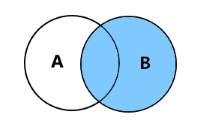

In [35]:
df = df_dedupped_SECOP.merge(df_dedupped_procesos, 
                             left_on='Referencia del Proceso', 
                             right_on='Referencia del Proceso', 
                             how = 'right')
print('Dimension bases unidas: ', df.shape)
print('Dimension SECOP: ', df_dedupped_SECOP.shape)
print('Dimension procesos: ', df_dedupped_procesos.shape)

Dimension bases unidas:  (2353, 33)
Dimension SECOP:  (803457, 26)
Dimension procesos:  (2350, 8)


In [36]:
df['Referencia del Proceso'].unique().shape

(2350,)

In [37]:
df['Referencia del Proceso'].value_counts(dropna=False)

SSPD-SA-011-2018 (Presentación de oferta)    2
016010518                                    2
20004820                                     2
85001720                                     1
40009920                                     1
                                            ..
016001719                                    1
52002820                                     1
040005021                                    1
84002720                                     1
020002821                                    1
Name: Referencia del Proceso, Length: 2350, dtype: int64

In [38]:
df[df['Referencia del Proceso'].duplicated(keep = False) == True]

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso_x,Fecha de Ultima Publicación,Precio Base,Modalidad de Contratacion_x,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Subtipo de Contrato,Modalidad de Contratacion_y,Fecha de Publicacion del Proceso_y,Número de Proceso,Descripción del Procedimiento,Cuantía,Unidad de Contratación,URLProceso
231,SUPERINTENDENCIA DE SERVICIOS PÚBLICOS DOMICIL...,800250984,No Definido,No Definido,Nacional,CO1.REQ.597435,016010518,CO1.BDOS.578133,Contratar el servicio de telefonía IP a nivel...,Presentación de oferta,10/25/2018,10/25/2018,1.737610e+09,Contratación Directa (con ofertas),2.0,Años,Si,CO1.AWD.382830,700087034,Empresa de Telecomunicaciones de Bogota ETB SA...,899999115,Distrito Capital de Bogotá,Bogotá,1.737610e+09,27 - Otros servicios,No Especificado,Contratación Directa (con ofertas),25/10/2018,Contratar el servicio de telefonía IP a nivel...,Contratar el servicio de telefonía IP a nivel...,1737610000,SECRETARIA GENERAL,https://community.secop.gov.co/Public/Tenderin...
232,SUPERINTENDENCIA DE SERVICIOS PÚBLICOS DOMICIL...,800250984,No Definido,No Definido,Nacional,CO1.REQ.597435,016010518,CO1.BDOS.578133,Contratar el servicio de telefonía IP a nivel...,Presentación de oferta,10/25/2018,10/25/2018,1.737610e+09,Contratación Directa (con ofertas),2.0,Años,Si,CO1.AWD.382038,700087034,Empresa de Telecomunicaciones de Bogota ETB SA...,899999115,Distrito Capital de Bogotá,Bogotá,1.737610e+09,27 - Otros servicios,No Especificado,Contratación Directa (con ofertas),25/10/2018,Contratar el servicio de telefonía IP a nivel...,Contratar el servicio de telefonía IP a nivel...,1737610000,SECRETARIA GENERAL,https://community.secop.gov.co/Public/Tenderin...
632,SUPERINTENDENCIA DE SERVICIOS PÚBLICOS DOMICIL...,800250984,No Definido,No Definido,Nacional,CO1.REQ.586815,SSPD-SA-011-2018 (Presentación de oferta),CO1.BDOS.558427,Adquisición de una solución tecnológica que pe...,Presentación de oferta,10/12/2018,10/12/2018,1.867953e+09,Selección abreviada subasta inversa,30.0,Dias,Si,CO1.AWD.388514,700006133,PROCIBERNETICA S.A.,860039333,Distrito Capital de Bogotá,No aplica,1.550000e+09,Compraventa,No Especificado,Selección abreviada subasta inversa,12/10/2018,Adquisición de una solución tecnológica que pe...,Adquisición de una solución tecnológica que pe...,1867952523,SECRETARIA GENERAL,https://community.secop.gov.co/Public/Tenderin...
633,SUPERINTENDENCIA DE SERVICIOS PÚBLICOS DOMICIL...,800250984,No Definido,No Definido,Nacional,CO1.REQ.586815,SSPD-SA-011-2018 (Presentación de oferta),CO1.BDOS.558427,Adquisición de una solución tecnológica que pe...,Presentación de oferta,10/12/2018,10/12/2018,1.867953e+09,Selección abreviada subasta inversa,30.0,Dias,Si,CO1.AWD.392037,700006133,PROCIBERNETICA S.A.,860039333,Distrito Capital de Bogotá,No aplica,1.550000e+09,Compraventa,No Especificado,Selección abreviada subasta inversa,12/10/2018,Adquisición de una solución tecnológica que pe...,Adquisición de una solución tecnológica que pe...,1867952523,SECRETARIA GENERAL,https://community.secop.gov.co/Public/Tenderin...
1814,SUPERINTENDENCIA DE SERVICIOS PÚBLICOS DOMICIL...,800250984,No Definido,No Definido,Nacional,CO1.REQ.1105356,20004820,CO1.BDOS.1068847,Prestar los servicios profesionales en la Dire...,Presentación de oferta,01/27/2020,01/27/2020,8.773331e+07,Contratación directa,11.0,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.000000e+00,Servicios de aprovisionamiento,No Especificado,Contratación directa,27/01/2020,Prestar los servicios profesionales en la Dire...,Prestar los servicios profesionales en la Dire...,87733314,DIRECCION ADMINISTRATIVA,https://community.secop.g

In [39]:
df2 = df.drop_duplicates(subset='Referencia del Proceso')
df2.shape

(2350, 33)

## Consistencia

In [40]:
df_dedupped_SECOP.dtypes

Entidad                             object
Nit Entidad                         object
Departamento Entidad                object
Ciudad Entidad                      object
OrdenEntidad                        object
ID del Proceso                      object
Referencia del Proceso              object
ID del Portafolio                   object
Nombre del Procedimiento            object
Fase                                object
Fecha de Publicacion del Proceso    object
Fecha de Ultima Publicación         object
Precio Base                          int64
Modalidad de Contratacion           object
Duracion                             int64
Unidad de Duracion                  object
Adjudicado                          object
ID Adjudicacion                     object
CodigoProveedor                     object
Nombre del Proveedor Adjudicado     object
NIT del Proveedor Adjudicado        object
Departamento Proveedor              object
Ciudad Proveedor                    object
Valor Total

### Consistencia datos categóricos y datos ordenados ordinales

Consistencia del NIT de la Entidad

In [41]:
df_dedupped_SECOP['EventCount'] = df_dedupped_SECOP['Nit Entidad'].str.len()
df_dedupped_SECOP['EventCount'].value_counts()

<ipython-input-41-2226442c7679>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dedupped_SECOP['EventCount'] = df_dedupped_SECOP['Nit Entidad'].str.len()


9     721010
10     82434
8         10
7          3
Name: EventCount, dtype: int64

In [42]:
df_dedupped_SECOP[df_dedupped_SECOP['EventCount'] == 7]

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso,Fecha de Ultima Publicación,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Subtipo de Contrato,EventCount
230728,PERSONERIA MUNICIPAL DE INIRIDA,7180873,Guainía,Inírida,Territorial,CO1.REQ.1613901,PER-INIR-MC-002-2020,CO1.BDOS.1564371,COMPRA DE VEHICULO TIPO MOTOCICLETA AUTOMATICA...,Presentación de oferta,11/18/2020,11/17/2020,10100000,Mínima cuantía,5,Dias,Si,CO1.AWD.892107,703215095,COMERCIAL MARINA DEL ORIENTE S.A.S.,900498855,Meta,Villavicencio,10000000,Suministros,No Especificado,7
378707,PERSONERIA MUNICIPAL DE INIRIDA,7180873,Guainía,Inírida,Territorial,CO1.REQ.1312804,PER- INIR -MC -001 -2020,CO1.BDOS.1272832,PER- INIR -MC -001 -2020,Presentación de oferta,06/01/2020,06/01/2020,6011458,Mínima cuantía,8,Dias,Si,CO1.AWD.761730,703226100,FABIAN ANEYDER JIMENEZ MENDOZA,1121718418,No aplica,No aplica,6011458,Suministros,No Especificado,7
542049,PERSONERIA MUNICIPAL DE INIRIDA,7180873,Guainía,Inírida,Territorial,CO1.REQ.1653918,PER-INIR-MC-003-2020,CO1.BDOS.1603519,"COMPRA DE ELEMENTOS DE SISTEMAS, ACCESORIOS TE...",Presentación de oferta,12/15/2020,12/15/2020,5312173,Mínima cuantía,4,Dias,Si,CO1.AWD.917819,703226100,FABIAN ANEYDER JIMENEZ MENDOZA,1121718418,No aplica,No aplica,5312173,Suministros,No Especificado,7


Averiguar el registro asociado al NIT https://www.rues.org.co/

In [43]:
df_consistency_SECOP = df_dedupped_SECOP[df_dedupped_SECOP['EventCount'] >= 9 ]
df_consistency_SECOP.shape

(803444, 27)

Consistencia de Unidad Duración

In [44]:
df_consistency_SECOP['Unidad de Duracion'].value_counts()

Dias     396834
Meses    370997
ND        29042
Años       6571
Name: Unidad de Duracion, dtype: int64

In [45]:
df_consistency_SECOP['Fase'].value_counts()

Presentación de oferta                             767595
Presentación de observaciones                       28306
Fase de ofertas                                      5427
Fase de Selección (Presentación de ofertas)          1678
Clarification submission                              201
Estimate Phase                                        152
Manifestación de interés (Menor Cuantía)               45
Proceso de ofertas                                     25
Selección de ofertas (borrador)                         7
Pré-Calificación de competidores                        5
Presentación de Observaciones                           1
Presentación de oferta (precalificación)                1
Presentación de observaciones (precalificación)         1
Name: Fase, dtype: int64

In [46]:
df_consistency_SECOP['Fecha de Publicacion del Proceso'].head()

0    01/21/2020
1    04/29/2020
2    02/03/2020
3    10/15/2020
4    01/29/2021
Name: Fecha de Publicacion del Proceso, dtype: object

In [47]:
df_consistency_SECOP['Fecha de Publicacion del Proceso'] = pd.to_datetime(df_consistency_SECOP['Fecha de Publicacion del Proceso'],format='%m/%d/%Y')
df_consistency_SECOP['Fecha de Publicacion del Proceso'].head()

<ipython-input-47-79f26518d4b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consistency_SECOP['Fecha de Publicacion del Proceso'] = pd.to_datetime(df_consistency_SECOP['Fecha de Publicacion del Proceso'],format='%m/%d/%Y')


0   2020-01-21
1   2020-04-29
2   2020-02-03
3   2020-10-15
4   2021-01-29
Name: Fecha de Publicacion del Proceso, dtype: datetime64[ns]

In [48]:
df_consistency_SECOP['Fecha de Ultima Publicación'].head()

0    01/21/2020
1    04/29/2020
2    02/03/2020
3    10/15/2020
4    01/29/2021
Name: Fecha de Ultima Publicación, dtype: object

In [49]:
df_consistency_SECOP['Año Publicación Proceso'] = df_consistency_SECOP['Fecha de Publicacion del Proceso'].dt.year
df_consistency_SECOP['Año Publicación Proceso'].value_counts()

<ipython-input-49-50ddf116ed8e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_consistency_SECOP['Año Publicación Proceso'] = df_consistency_SECOP['Fecha de Publicacion del Proceso'].dt.year


2020    382381
2018    163649
2019    145799
2021     70700
2017     35310
2016      4666
2015       939
Name: Año Publicación Proceso, dtype: int64

**_Ejercicio_** ¿Qué otra fecha puede ser modificada a un formato fecha?

### Consistencia datos ordenados cuantitativos

In [50]:
pd.options.display.float_format = "{:.2f}".format

In [51]:
df_consistency_SECOP['Precio Base'].describe()

count              803444.00
mean          50694119424.65
std        43801359792080.51
min            -799983710.00
25%               7000000.00
50%              19500000.00
75%              49500000.00
max     39251534400000000.00
Name: Precio Base, dtype: float64

In [52]:
df_consistency_SECOP[df_consistency_SECOP['Precio Base'] < 0]

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso,Fecha de Ultima Publicación,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Subtipo de Contrato,EventCount,Año Publicación Proceso
32,ALCALDIA LOCAL DE BOSA,8999990615,Distrito Capital de Bogotá,Bogotá,Territorial,CO1.REQ.1449828,FDLB-SIP-011-2020,CO1.BDOS.1406747,SOLICITUD DE COTIZACIÓN DE ELEMENTOS AUDIOVISU...,Presentación de oferta,2020-08-20,08/20/2020,-1,Solicitud de información a los Proveedores,5,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,ND,No Especificado,10,2020
47,AUTORIDAD NACIONAL DE ACUICULTURA Y PESCA,900479669,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1369908,DTIV-002-2020,CO1.BDOS.1328522,SOLICITUD COTIZACIÓN IMPLEMENTOS DTIV,Presentación de oferta,2020-07-08,07/08/2020,-1,Solicitud de información a los Proveedores,90,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,ND,No Especificado,9,2020
92,SUPERINTENDENCIA FINANCIERA DE COLOMBIA,890999057,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1742017,COT.PSA-016-2021,CO1.BDOS.1691815,Adquisición y renovación de bases de datos y p...,Presentación de oferta,2021-01-24,01/23/2021,-1,Solicitud de información a los Proveedores,180,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,ND,No Especificado,9,2021
99,AGENCIA LOGISTICA DE LAS FUERZAS MILITARES,899999162,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1187844,Cotizacion Proceso de Mantenimientos de Vehiculos,CO1.BDOS.1150412,MANTENIMIENTO PREVENTIVO Y CORRECTIVO A TODO C...,Presentación de oferta,2020-03-06,03/06/2020,-1,Solicitud de información a los Proveedores,9,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,ND,No Especificado,9,2020
170,HOSPITAL MILITAR CENTRAL,830040256,Distrito Capital de Bogotá,No Definido,Nacional,CO1.REQ.576956,COT-225 HOSMIL-2018,CO1.BDOS.558045,SUMINISTRO DE INSUMOS MEDICO QUIRURGICOS PARA ...,Presentación de oferta,2018-10-03,10/03/2018,-1,Solicitud de información a los Proveedores,0,ND,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,ND,No Especificado,9,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805513,MUNICIPIO DE SANTIAGO DE CALI - SECRETARÍA DE ...,890399011,Valle del Cauca,Cali,Territorial,CO1.REQ.757866,SIP 4163.029,CO1.BDOS.735967,Asistir la capacidad operativa para la actuaci...,Presentación de oferta,2019-02-11,02/11/2019,-1,Solicitud de información a los Proveedores,9,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,ND,No Especificado,9,2019
805557,SENA REGIONAL VALLE Grupo de Apoyo Administrat...,899999034,Valle del Cauca,Cali,Nacional,CO1.REQ.1265397,SOLICITUD PRE COTIZACIONES MC-VLL-CDTI-0021-2020,CO1.BDOS.1227403,MANTENIMIENTO TRAMPA GRASA,Presentación de oferta,2020-04-29,04/29/2020,-1,Solicitud de información a los Proveedores,30,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,ND,No Especificado,9,2020
805560,SUBRED INTEGRADA DE SERVICIOS DE SALUD CENTRO ...,900959051,No Definido,No Definido,Territorial,CO1.REQ.1065624,EM-012-2020,CO1.BDOS.1028931,CONTRATAR EL SUMINISTRO DE MEDICAMENTOS QUE SE...,Presentación de oferta,2020-01-08,01/08/2020,-1,Solicitud de información a los Proveedores,4,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,ND,No Especificado,9,2020
805588,INSTITUTO NACIONAL DE SALUD,899999403,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1542502,SOLICITUD DE COTIZACIÓN INS-

In [53]:
df_consistency_SECOP = df_consistency_SECOP[df_consistency_SECOP['Precio Base'] >= 0]

In [54]:
df_consistency_SECOP.shape

(781762, 28)

In [55]:
df_consistency_SECOP['Precio Base'].describe()

count              781762.00
mean          52100115521.54
std        44404616164489.66
min                     0.00
25%               7811258.75
50%              20244118.50
75%              50780730.00
max     39251534400000000.00
Name: Precio Base, dtype: float64

Instalar pandas profiling pip install pandas_profiling

In [56]:
from pandas_profiling import ProfileReport

In [57]:
ProfileReport(df_consistency_SECOP.sample(10000), title="Pandas Profiling Report")

**_Ejercicio_**: Realice consistencia para el dataset procesos

In [58]:
df_consistency_SECOP.dtypes

Entidad                                     object
Nit Entidad                                 object
Departamento Entidad                        object
Ciudad Entidad                              object
OrdenEntidad                                object
ID del Proceso                              object
Referencia del Proceso                      object
ID del Portafolio                           object
Nombre del Procedimiento                    object
Fase                                        object
Fecha de Publicacion del Proceso    datetime64[ns]
Fecha de Ultima Publicación                 object
Precio Base                                  int64
Modalidad de Contratacion                   object
Duracion                                     int64
Unidad de Duracion                          object
Adjudicado                                  object
ID Adjudicacion                             object
CodigoProveedor                             object
Nombre del Proveedor Adjudicado

In [59]:
df_consistency_SECOP['Modalidad de Contratacion'].value_counts()

Contratación directa                                           490595
Contratación régimen especial                                  111676
Mínima cuantía                                                  74980
Contratación Directa (con ofertas)                              28101
Selección Abreviada de Menor Cuantía                            25259
Selección abreviada subasta inversa                             22497
Concurso de méritos abierto                                      7497
Contratación régimen especial (con ofertas)                      7311
Licitación pública                                               7027
Licitación pública Obra Publica                                  2765
Solicitud de información a los Proveedores                       2509
Licitación Pública Acuerdo Marco de Precios                       952
Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes       455
Enajenación de bienes con sobre cerrado                            67
Enajenación de biene

## Detalles finales

In [60]:
df_consistency_SECOP.shape

(781762, 28)

In [61]:
df_consistency_SECOP.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            805621, 805622, 805623, 805624, 805625, 805626, 805627, 805628,
            805629, 805630],
           dtype='int64', length=781762)

In [62]:
df_consistency_SECOP.shape[0]

781762

In [63]:
range(df_consistency_SECOP.shape[0])

range(0, 781762)

Reindexar

In [66]:
df_consistency_SECOP.reindex(range(1,df_consistency_SECOP.shape[0]))

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso,Fecha de Ultima Publicación,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Subtipo de Contrato,EventCount,Año Publicación Proceso
1,MUNICIPIO DE SANTIAGO DE CALI - SECRETARIA DE ...,890399011,No Definido,No Definido,Territorial,CO1.REQ.1263855,4145.010.32.1.0131-2020,CO1.BDOS.1225749,PROFESIONALES DESARROLLO DE ESTRATEGIAS PARA L...,Presentación de oferta,2020-04-29,04/29/2020,29117793.00,Contratación directa,0.00,ND,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.00,Servicios de aprovisionamiento,No Especificado,9.00,2020.00
2,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,No Definido,No Definido,Territorial,CO1.REQ.1116938,SGA-CD-151-2020_2,CO1.BDOS.1077727,SGA-CD-151-2020_2,Presentación de oferta,2020-02-03,02/03/2020,29816133.00,Contratación directa,165.00,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.00,Servicios de aprovisionamiento,No Especificado,9.00,2020.00
3,SENA REGIONAL DISTRITO CAPITAL Grupo Administr...,899999034,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1546629,PSP-DC-CICG-083-2020,CO1.BDOS.1501825,Prestación de servicios personales de carácter...,Presentación de oferta,2020-10-15,10/15/2020,6443255.00,Contratación directa,51.00,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.00,Servicios de aprovisionamiento,No Especificado,9.00,2020.00
4,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,900971006,No Definido,No Definido,Territorial,CO1.REQ.1765407,CPS-1339-2021,CO1.BDOS.1715307,PRESTAR SERVICIOS PROFESIONALES Y APOYO A LA G...,Presentación de oferta,2021-01-29,01/29/2021,2980278.00,Contratación régimen especial,1.00,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.00,Decreto 092 de 2017,No Especificado,9.00,2021.00
5,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,900971006,No Definido,No Definido,Territorial,CO1.REQ.1129221,CPS-2207-2020,CO1.BDOS.1092923,PRESTAR SERVICIOS PROFESIONALES Y APOYO A LA G...,Presentación de oferta,2020-02-06,02/05/2020,5158152.00,Contratación régimen especial,2.00,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.00,Decreto 092 de 2017,No Especificado,9.00,2020.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781757,CENTRO DE MEMORIA HISTORICA,900492141,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1114862,151-2020_3,CO1.BDOS.1078256,MARÍA EUGENIA GONZALEZ VELEZ,Presentación de oferta,2020-01-30,01/30/2020,84163299.00,Contratación directa,12.00,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.00,Servicios de aprovisionamiento,No Especificado,9.00,2020.00
781758,MINISTERIO DE CULTURA,830034348,No Definido,No Definido,Nacional,CO1.REQ.264239,MC LIC USO 001 2017,CO1.BDOS.256533,LABORATORIOS BLACK VELVET LTDA.,Presentación de oferta,2017-11-28,11/28/2017,1000000.00,Contratación Directa (con ofertas),2.00,Años,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.00,27 - Otros servicios,No Especificado,9.00,2017.00
781759,INSTITUTO DISTRITAL DE PATRIMONIO CULTURAL,860506170,Distrito Capital de Bogotá,Bogotá,Territorial,CO1.REQ.316623,IDPC-PSAG-055-2018,CO1.BDOS.308534,YURI ALEJANDRA QUINTERO CASTAÑO,Presentación de oferta,2018-01-18,01/18/2018,0.00,Contratación directa,11.00,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0.00,Servicios de aprovisionamiento,No Especificado,9.00,2018.00
781760,POLICÍA METROPOLITANA DE T

Revisión de variables

In [67]:
df_consistency_SECOP = df_consistency_SECOP.drop(['EventCount','Año Publicación Proceso'], axis=1)
df_consistency_SECOP.head()

,Entidad,Nit Entidad,Departamento Entidad,Ciudad Entidad,OrdenEntidad,ID del Proceso,Referencia del Proceso,ID del Portafolio,Nombre del Procedimiento,Fase,Fecha de Publicacion del Proceso,Fecha de Ultima Publicación,Precio Base,Modalidad de Contratacion,Duracion,Unidad de Duracion,Adjudicado,ID Adjudicacion,CodigoProveedor,Nombre del Proveedor Adjudicado,NIT del Proveedor Adjudicado,Departamento Proveedor,Ciudad Proveedor,Valor Total Adjudicacion,Tipo de Contrato,Subtipo de Contrato
0,SUPERINTENDENCIA DE VIGILANCIA Y SEGURIDAD PRI...,800217123,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1090917,CDPS-018-2020_2,CO1.BDOS.1054442,CONTRATO DE PRESTACIÓN DE SERVICIOS.,Presentación de oferta,2020-01-21,01/21/2020,34387200,Contratación directa,8,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
1,MUNICIPIO DE SANTIAGO DE CALI - SECRETARIA DE ...,890399011,No Definido,No Definido,Territorial,CO1.REQ.1263855,4145.010.32.1.0131-2020,CO1.BDOS.1225749,PROFESIONALES DESARROLLO DE ESTRATEGIAS PARA L...,Presentación de oferta,2020-04-29,04/29/2020,29117793,Contratación directa,0,ND,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
2,SECRETARÍA GENERAL DE LA ALCALDÍA MAYOR DE BOGOTÁ,899999061,No Definido,No Definido,Territorial,CO1.REQ.1116938,SGA-CD-151-2020_2,CO1.BDOS.1077727,SGA-CD-151-2020_2,Presentación de oferta,2020-02-03,02/03/2020,29816133,Contratación directa,165,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
3,SENA REGIONAL DISTRITO CAPITAL Grupo Administr...,899999034,Distrito Capital de Bogotá,Bogotá,Nacional,CO1.REQ.1546629,PSP-DC-CICG-083-2020,CO1.BDOS.1501825,Prestación de servicios personales de carácter...,Presentación de oferta,2020-10-15,10/15/2020,6443255,Contratación directa,51,Dias,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Servicios de aprovisionamiento,No Especificado
4,SUBRED INTEGRADA DE SERVICIOS DE SALUD NORTE E...,900971006,No Definido,No Definido,Territorial,CO1.REQ.1765407,CPS-1339-2021,CO1.BDOS.1715307,PRESTAR SERVICIOS PROFESIONALES Y APOYO A LA G...,Presentación de oferta,2021-01-29,01/29/2021,2980278,Contratación régimen especial,1,Meses,No,No Adjudicado,No Adjudicado,No Adjudicado,No Adjudicado,No aplica,No aplica,0,Decreto 092 de 2017,No Especificado


Exportar los datos

In [68]:
df_consistency_SECOP.to_csv("Datos_SECOP.csv")